In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale= 1./255,horizontal_flip = True,vertical_flip = True,zoom_range = 0.2)

In [ ]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [7]:
x_train = train_datagen.flow_from_directory("/content/drive/MyDrive/IBM Asignment Dataset/flowers",target_size = (64,64),
                                            class_mode = "categorical",batch_size = 24)

Found 4317 images belonging to 5 classes.


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
x_test = test_datagen.flow_from_directory("/content/drive/MyDrive/IBM Asignment Dataset/flowers",target_size = (64,64),
                                                                                      class_mode = "categorical",)

Found 4317 images belonging to 5 classes.


In [10]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten

In [12]:
model=Sequential()

In [13]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [15]:
model.add(Dense(5,activation='softmax'))
len(x_train)

180

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10
180/180 [==============================] - 656s 4s/step - loss: 1.3159 - accuracy: 0.4691 - val_loss: 1.1333 - val_accuracy: 0.5601
Epoch 2/10
180/180 [==============================] - 60s 333ms/step - loss: 1.0514 - accuracy: 0.5810 - val_loss: 0.9281 - val_accuracy: 0.6169
Epoch 3/10
180/180 [==============================] - 60s 334ms/step - loss: 0.9681 - accuracy: 0.6217 - val_loss: 0.9320 - val_accuracy: 0.6238
Epoch 4/10
180/180 [==============================] - 60s 334ms/step - loss: 0.9226 - accuracy: 0.6449 - val_loss: 1.0677 - val_accuracy: 0.5807
Epoch 5/10
180/180 [==============================] - 60s 331ms/step - loss: 0.8820 - accuracy: 0.6657 - val_loss: 0.9081 - val_accuracy: 0.6472
Epoch 6/10
180/180 [==============================] - 59s 330ms/step - loss: 0.8483 - accuracy: 0.6729 - val_loss: 0.8602 - val_accuracy: 0.6593
Epoch 7/10
180/180 [==============================] - 59s 329ms/step - loss: 0.8024 - accuracy: 0.6894 - val_loss: 0.8268 - val_accu

In [18]:
model.save('IBM_flowers.h5')

In [19]:
pwd

'/content'

In [20]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [39]:
model=load_model('IBM_flowers.h5')

In [40]:
img=image.load_img('/content/drive/MyDrive/IBM Asignment Dataset/flowers/dandelion/10683189_bd6e371b97.jpg')

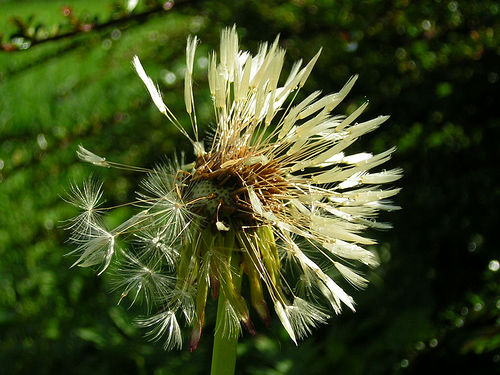

In [41]:
img

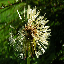

In [43]:
img=image.load_img(r'/content/drive/MyDrive/IBM Asignment Dataset/flowers/dandelion/10683189_bd6e371b97.jpg',target_size=(64,64))
img

In [44]:
x=image.img_to_array(img)
x

array([[[ 58.,  96.,  11.],
        [ 43.,  87.,   2.],
        [ 54.,  82.,   8.],
        ...,
        [ 14.,  27.,   9.],
        [ 19.,  37.,   0.],
        [ 12.,  24.,   4.]],

       [[ 63., 113.,   0.],
        [ 70., 116.,   8.],
        [ 72., 124.,  16.],
        ...,
        [ 26.,  35.,   6.],
        [ 21.,  37.,   0.],
        [ 53.,  79.,  31.]],

       [[ 85., 133.,  15.],
        [ 90., 134.,  23.],
        [ 95., 134.,  25.],
        ...,
        [  7.,  19.,   5.],
        [ 17.,  27.,  16.],
        [ 14.,  35.,   2.]],

       ...,

       [[ 12.,  25.,   7.],
        [ 12.,  25.,   8.],
        [ 14.,  28.,   5.],
        ...,
        [  0.,   2.,   0.],
        [  1.,   3.,   0.],
        [ 25.,  33.,  22.]],

       [[ 12.,  25.,   7.],
        [ 13.,  27.,   4.],
        [ 21.,  36.,   7.],
        ...,
        [  0.,   2.,   0.],
        [  1.,   3.,   0.],
        [  0.,   5.,   0.]],

       [[ 13.,  26.,   9.],
        [ 12.,  24.,   2.],
        [  9.,  

In [45]:
x=np.expand_dims(x,axis=0)
x

array([[[[ 58.,  96.,  11.],
         [ 43.,  87.,   2.],
         [ 54.,  82.,   8.],
         ...,
         [ 14.,  27.,   9.],
         [ 19.,  37.,   0.],
         [ 12.,  24.,   4.]],

        [[ 63., 113.,   0.],
         [ 70., 116.,   8.],
         [ 72., 124.,  16.],
         ...,
         [ 26.,  35.,   6.],
         [ 21.,  37.,   0.],
         [ 53.,  79.,  31.]],

        [[ 85., 133.,  15.],
         [ 90., 134.,  23.],
         [ 95., 134.,  25.],
         ...,
         [  7.,  19.,   5.],
         [ 17.,  27.,  16.],
         [ 14.,  35.,   2.]],

        ...,

        [[ 12.,  25.,   7.],
         [ 12.,  25.,   8.],
         [ 14.,  28.,   5.],
         ...,
         [  0.,   2.,   0.],
         [  1.,   3.,   0.],
         [ 25.,  33.,  22.]],

        [[ 12.,  25.,   7.],
         [ 13.,  27.,   4.],
         [ 21.,  36.,   7.],
         ...,
         [  0.,   2.,   0.],
         [  1.,   3.,   0.],
         [  0.,   5.,   0.]],

        [[ 13.,  26.,   9.],
       

In [46]:
y=np.argmax(model.predict(x),axis=1)
y

1/1 [==============================] - 0s 66ms/step


array([0])

In [47]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [48]:
index=['daisy','dandelion','rose','sunflower','tulip']

In [49]:
index[y[0]]

'daisy'